<a href="https://colab.research.google.com/github/Immaczx/Dash_whit_plotly/blob/main/Ejemplo_Dashboard_Dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar dash



In [1]:
pip install jupyter-dash -q

     |████████████████████████████████| 81kB 1.7MB/s 
     |████████████████████████████████| 1.0MB 4.7MB/s 
     |████████████████████████████████| 3.5MB 25.3MB/s 
     |████████████████████████████████| 92kB 11.0MB/s 
     |████████████████████████████████| 1.8MB 35.8MB/s 
     |████████████████████████████████| 358kB 40.5MB/s 


In [2]:
pip install dash-cytoscape -q

     |████████████████████████████████| 3.6MB 5.2MB/s 


In [3]:
! pip install pyngrok

     |████████████████████████████████| 747kB 5.2MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=923f95b7c0199377f8f895051e12e9149e4ed65d45fd89f8f385ebddf27864f9
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


## Importar librerías

In [4]:
from jupyter_dash import JupyterDash  # pip install dash
import dash_cytoscape as cyto  # pip install dash-cytoscape==0.2.0 or higher
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input
import pandas as pd  # pip install pandas
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import math
import datetime
from dash import no_update
import base64
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")
import dash
from plotly.subplots import make_subplots

# Configurar Nkrok

In [5]:
import requests
# download ngrok first
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -q
!unzip -q ngrok-stable-linux-amd64.zip

In [6]:
get_ipython().system_raw('./ngrok http 8050 &')
# check public url
import time
time.sleep(3)
r = requests.get('http://localhost:4040/api/tunnels')
urls = r.json()['tunnels'][0]['public_url']

In [7]:
urls

'https://3edac81d0b7e.ngrok.io'

# Ejemplo de montar dash con potly trabajo anterior Codiv19

Configurar Style

In [8]:

!git clone https://github.com/cmosquerat/style assets

Cloning into 'assets'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [9]:
#descargar datos covid
!pip install wget
import wget
import pandas as pd
#dato CSSEGISandData
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
#datos covid19 - mundo
#url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
#datos Colombia
#url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"
Xd = pd.read_csv(url)
#wget.download(url, 'covid.csv')
#Xd = pd.read_csv('covid.csv')


  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=1132778a1971910ce0d6a280083e8372998601a431c860c83909e5150510459e
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [10]:
Xd

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304,11794,12150,12508,12978,13258,13530,13782,13989,14323,14537,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,307838,308048,308350,308732,309036,309333,309644,309853,310026,310026,310544,310544,311018,311018,311018,311534,311690,311948,312164,312334,312499,312605,312673,312811,313015,313015,313015,313520,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6731,6737,6742,6751,6759,6767,6773,6780,6787,6812,6823,6832,6836,6856,6857,6862,6863,6864,6867,6869,6875,6877,6885,6889,6892,6898,6905,6905,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,94751,9505

In [11]:
C=Xd.columns[4:]
fig = px.scatter_geo(Xd, lat="Lat", lon="Long", hover_name="Country/Region", size=C[400], projection="natural earth")
#animation_frame="Country/Region"
# size="3/5/21"
fig.show()

In [12]:
confirmed_df = Xd
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()
world_cases = []
for i in dates:
    confirmed_sum = confirmed[i].sum()
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)

def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


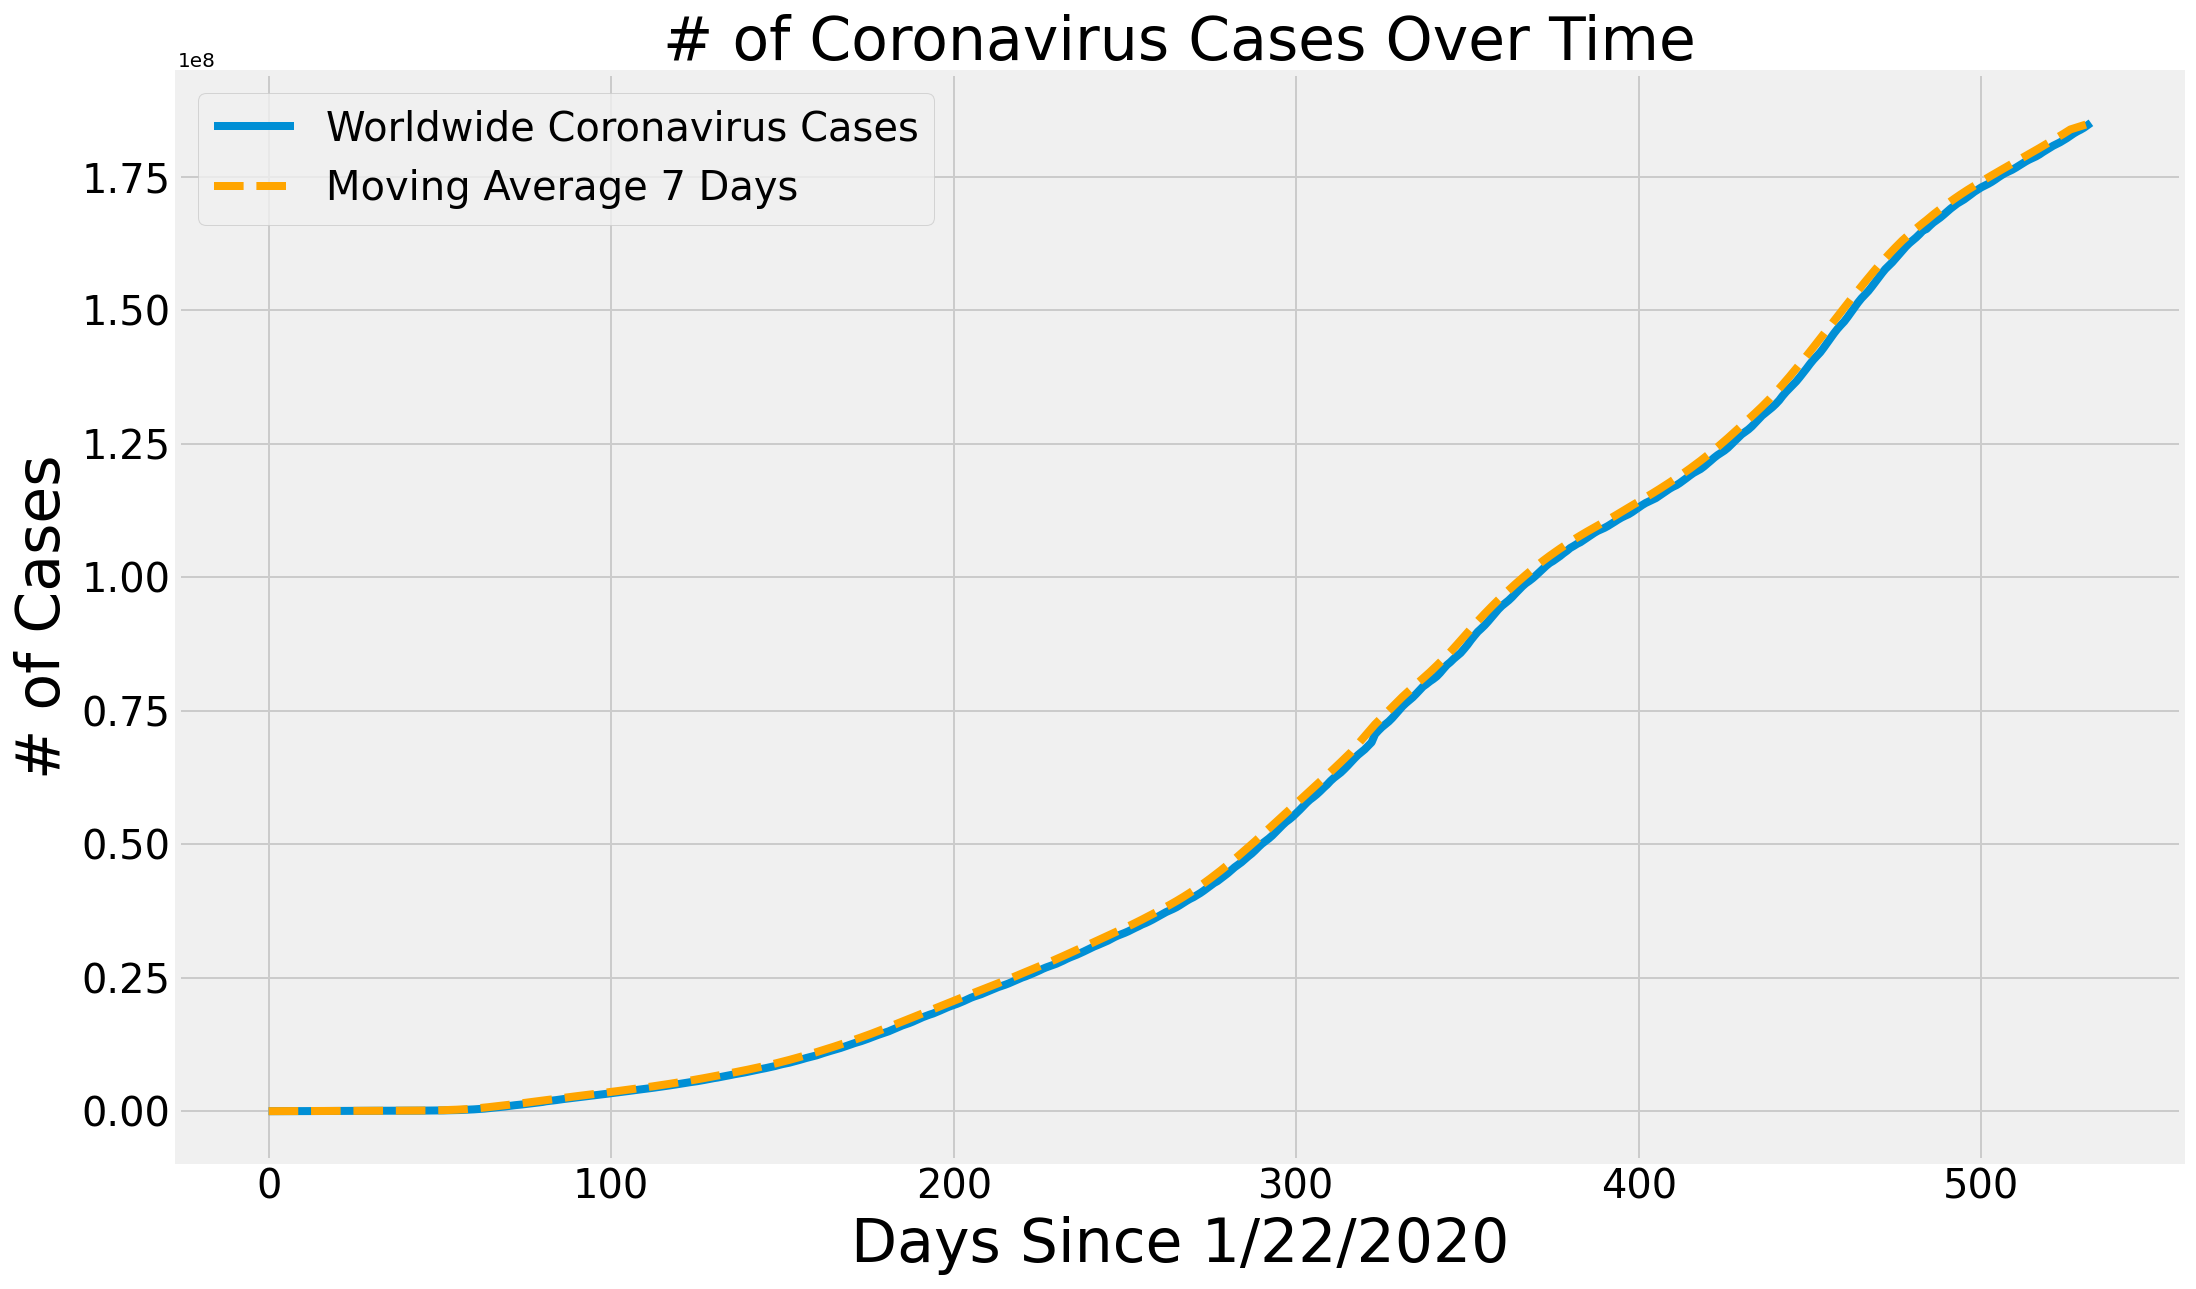

In [13]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.05, shuffle=False)
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


fig_0 = px.line(x=adjusted_dates, y=world_cases)
fig_0.add_trace(go.Scatter(x=adjusted_dates, y=world_cases, name='Casos Mundiales'))
fig_0.add_trace(go.Scatter(x=adjusted_dates, y= world_confirmed_avg, name='Media de 7 días'.format(window)))
fig_0.update_layout(title_text='Casos de COVID-19', height=800)
fig_0.update_xaxes(title_text='Días desde 1/22/2020')
fig_0.update_yaxes(title_text='# de casos')
fig_0.update_xaxes(rangeslider_visible=True)
fig_0.show()

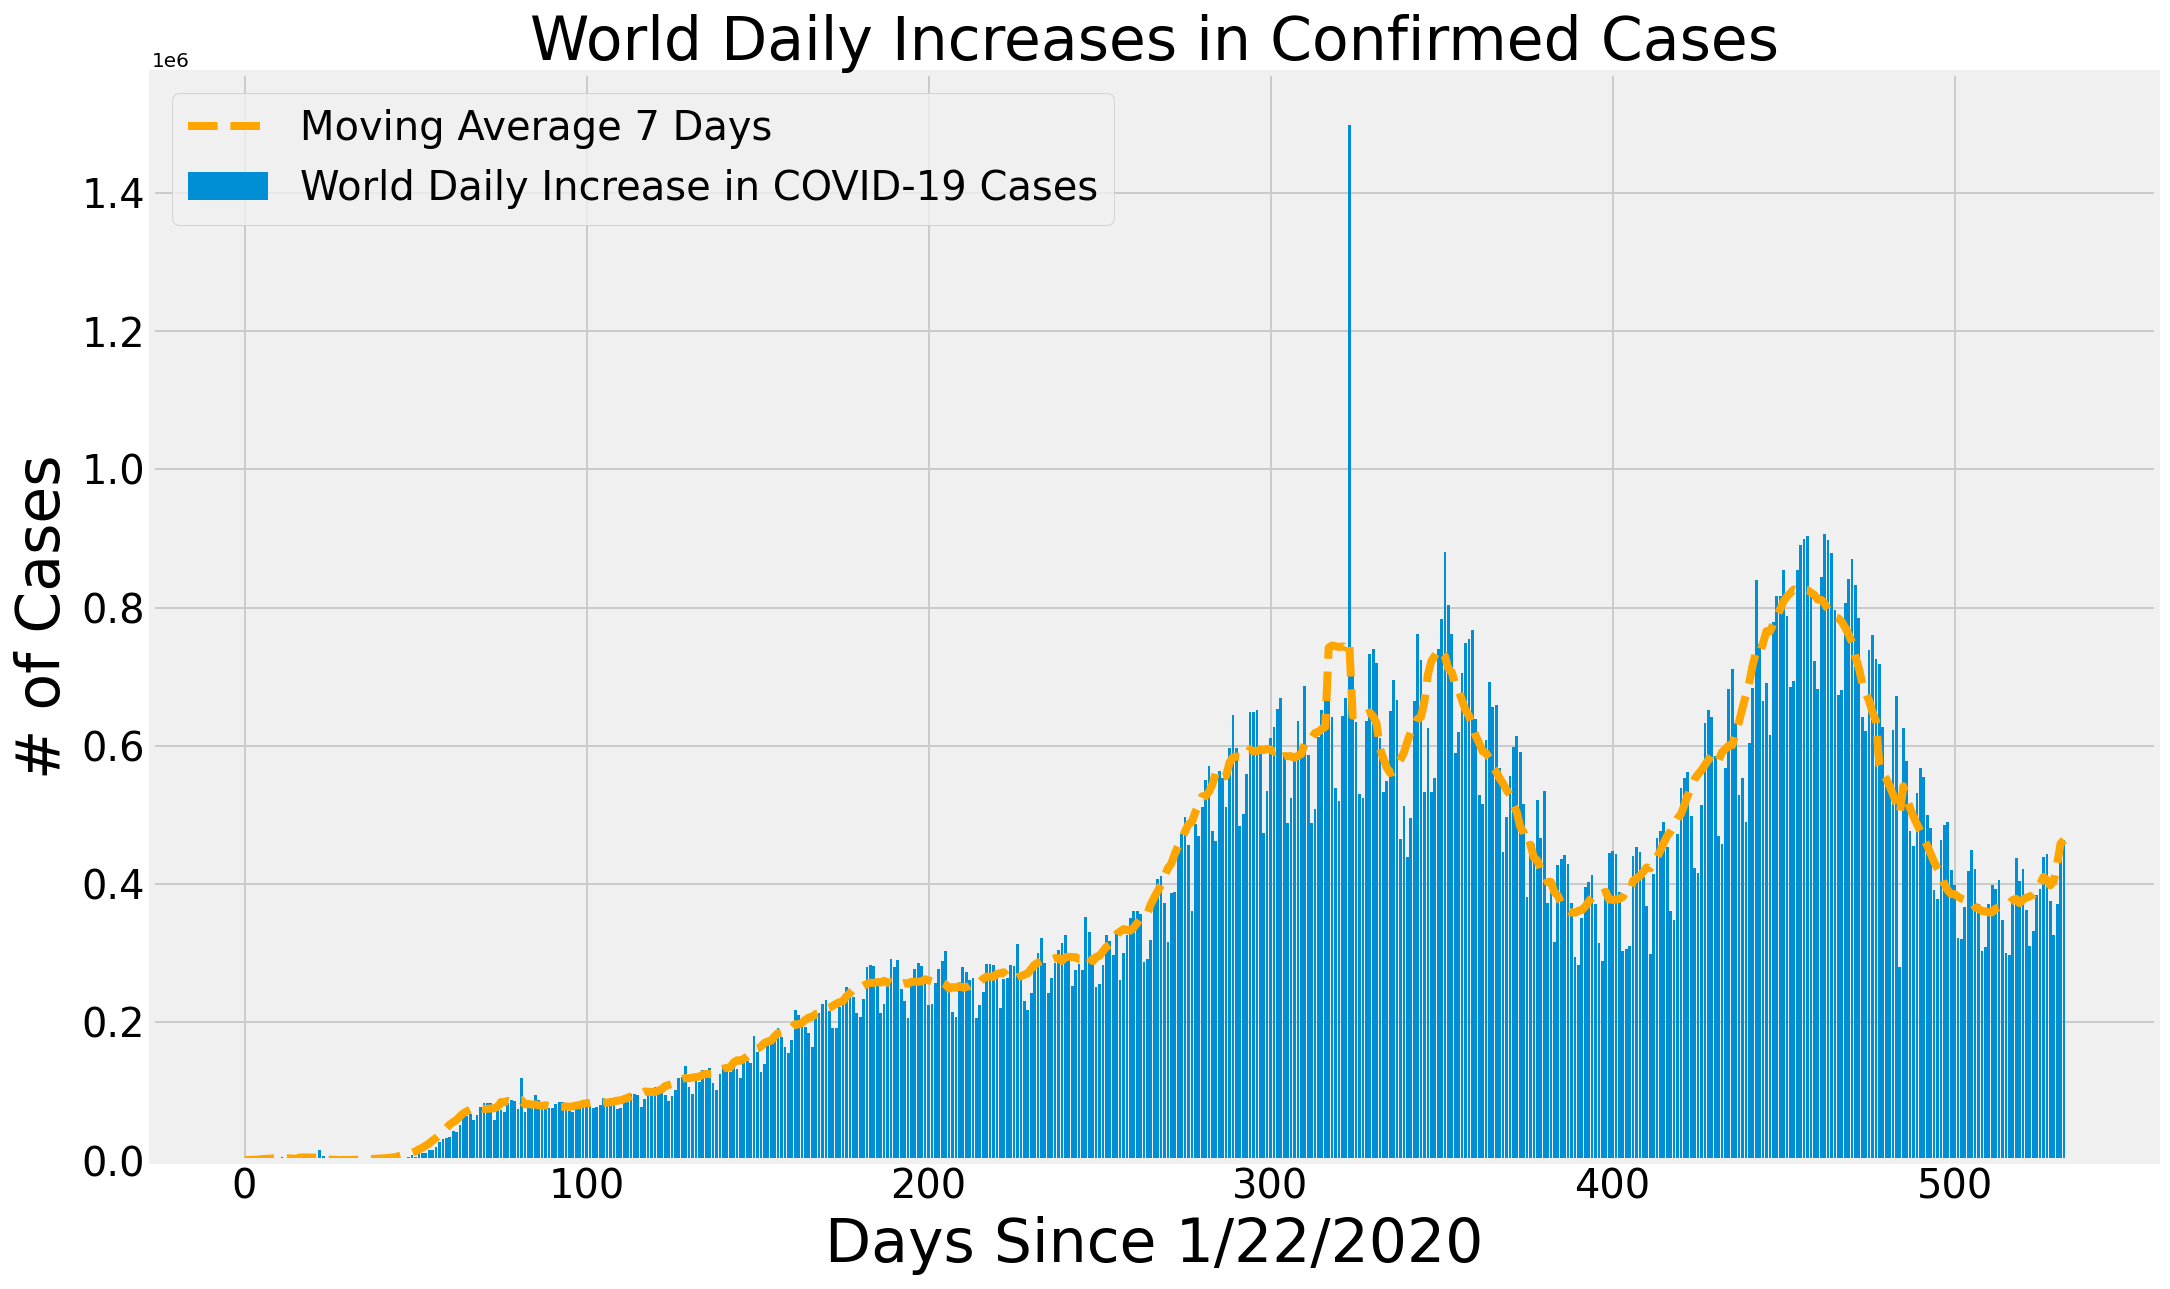

In [14]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()
fig_1= go.Figure()
trace1 = go.Bar(y=world_daily_increase,name='Incremento díario de casos de Coronavirus mundial')
trace2 = go.Scatter(y=world_daily_increase_avg,name='Media de 7 días'.format(window))
fig_1.add_traces([trace1, trace2])
fig_1.update_layout(title_text='Incremento díario de casos de Coronavirus mundial', height=800)
fig_1.update_xaxes(title_text='Days desde 1/22/2020')
fig_1.update_yaxes(title_text='Número de casos')
fig_1.update_xaxes(rangeslider_visible=True)
fig_1.show()

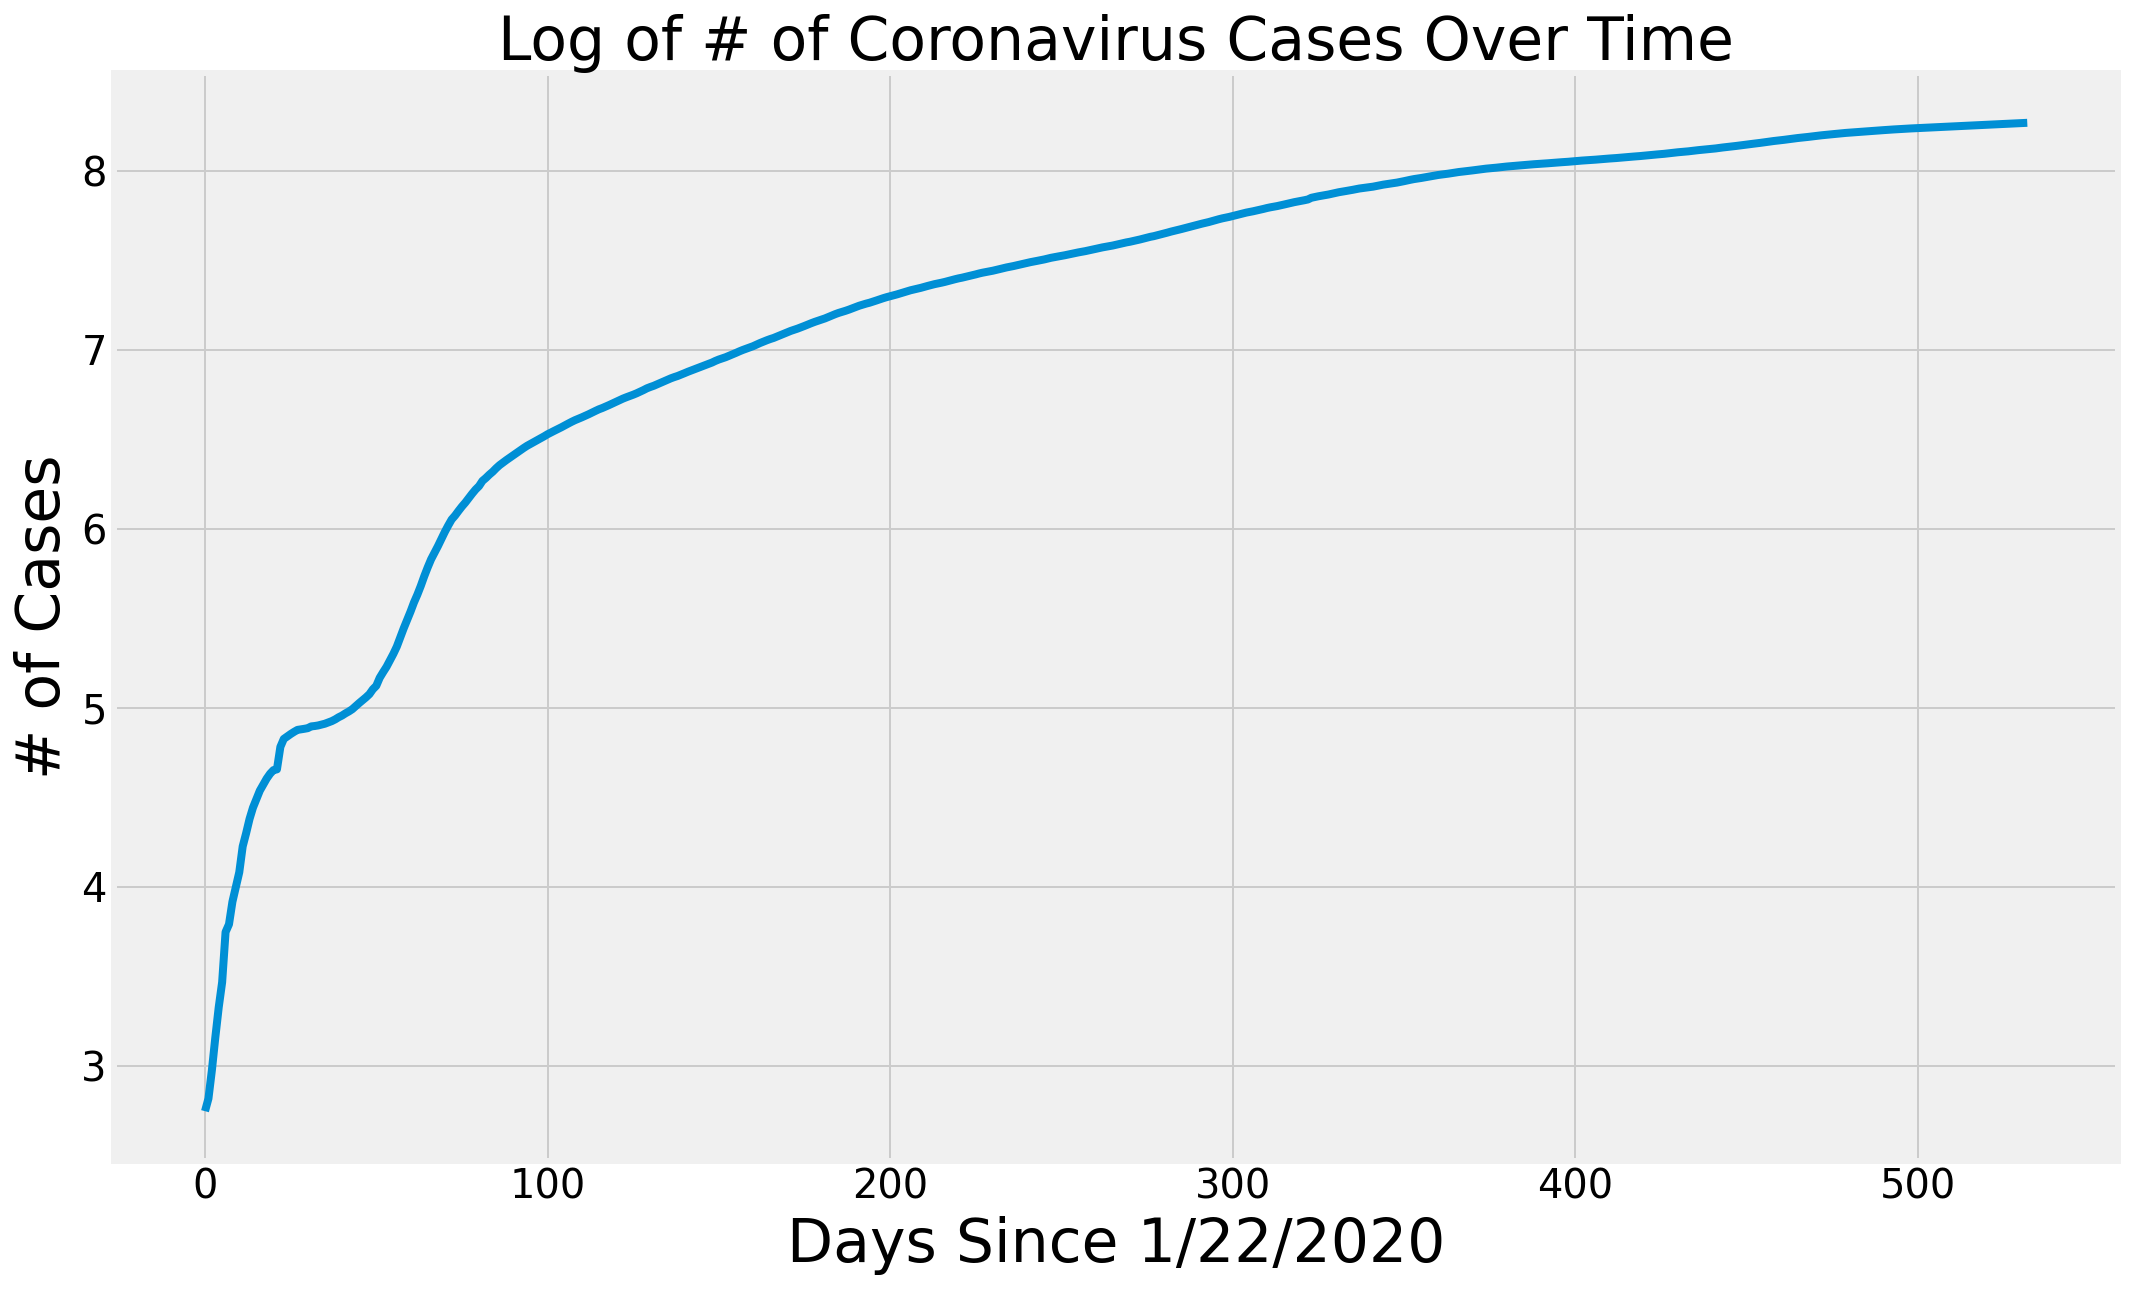

In [15]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

fig_2= px.line(x=adjusted_dates,y=np.log10(world_cases))
fig_2.update_layout(title_text='Log of # of Coronavirus Cases Over Time', height=800)
fig_2.update_xaxes(title_text='Days Since 1/22/2020')
fig_2.update_yaxes(title_text='# of Cases')
fig_2.show()

In [16]:
def country_plot(x, y1, y2, y3, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
#     recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

#     plt.figure(figsize=(16, 10))
#     plt.bar(x, y4)
#     plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
#     plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
#     plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
#     plt.xlabel('Days Since 1/22/2020', size=30)
#     plt.ylabel('# of Cases', size=30)
#     plt.xticks(size=20)
#     plt.yticks(size=20)
#     plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
#     country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
#         country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
#     country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)


def plot_pie_charts(x, y, title):
    # more muted color 
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True, labels=y)
    plt.legend(x, loc='best', fontsize=12)
    plt.show()


In [17]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
countries = ['US', 'Russia', 'India', 'Brazil', 'South Africa', 'China', 'Italy',
             'Germany', 'Spain', 'France', 'United Kingdom', 'Peru', 'Mexico', 'Colombia', 'Argentina', 'Saudi Arabia', 'Iran', 'Bangladesh',
            'Pakistan', 'Turkey', 'Philippines', 'Iraq', 'Indonesia', 'Israel', 'Ukraine', 'Ecuador', 'Bolivia', 'Netherlands', 'Belgium', 'Poland', 'Czechia', 'Switzerland',
            'Romania', 'Morocco','Portugal', 'Austria', 'Sweden'] 

In [18]:

country_info = get_country_info("Colombia")
country_cases = country_info[0]
country_deaths = country_info[1]
    
country_daily_increase = daily_increase(country_cases)
country_daily_death = daily_increase(country_deaths)

confirmed_avg = moving_average(country_cases, window)
confirmed_increase_avg = moving_average(country_daily_increase, window)
death_increase_avg = moving_average(country_daily_death, window)


fig_3= go.Figure(data=go.Scatter(x=adjusted_dates,y=country_cases, line=dict(color='royalblue', width=4), name="Casos Confirmados en Colombia"))
fig_3.add_trace(go.Scatter(x=adjusted_dates, y=confirmed_avg,name="Media de 7 días",
                    line=dict(color='firebrick', width=4,
                              dash='dash')))
fig_3.update_layout(title_text='Casos confirmados en Colombia', height=800)
fig_3.update_xaxes(rangeslider_visible=True,title_text='Días desde 1/22/2020')
fig_3.update_yaxes(title_text='# de casos')
fig_3.show()

In [19]:
fig_4= go.Figure(data=go.Scatter(x=adjusted_dates,y=country_daily_increase, line=dict(color='royalblue', width=4), name="Casos Confirmados en Colombia (Diariamente)"))
fig_4.add_trace(go.Scatter(x=adjusted_dates, y=confirmed_increase_avg,name="Media de 7 días",
                    line=dict(color='firebrick', width=4,
                              dash='dash')))
fig_4.update_layout(title_text='Casos diarios en Colombia', height=800)
fig_4.update_xaxes(rangeslider_visible=True,title_text='Días desde 1/22/2020')
fig_4.update_yaxes(title_text='# de casos')
fig_4.show()

In [20]:
fig_5= go.Figure(data=go.Scatter(x=adjusted_dates,y=country_daily_death, line=dict(color='royalblue', width=4), name="Muertes en Colombia (Diariamente)"))
fig_5.add_trace(go.Scatter(x=adjusted_dates, y=death_increase_avg,name="Media de 7 días",
                    line=dict(color='firebrick', width=4,
                              dash='dash')))
fig_5.update_layout(title_text='Muertes en Colombia', height=800)
fig_5.update_xaxes(rangeslider_visible=True,title_text='Días desde 1/22/2020')
fig_5.update_yaxes(title_text='# de casos')
fig_5.show()

In [21]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], country_cases[50:], test_size=0.05, shuffle=False)
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

fig_6= go.Figure(data=go.Scatter(x=adjusted_dates,y=country_cases, line=dict(color='royalblue', width=4), name="Casos Confirmados en Colombia (Diariamente)"))
fig_6.add_trace(go.Scatter(x=adjusted_dates, y=svm_pred,name="Predicción SVM",
                    line=dict(color='firebrick', width=4,
                              dash='dash')))
fig_6.update_layout(title_text='Predicción SVM Colombia', height=800)
fig_6.update_xaxes(rangeslider_visible=True,title_text='Días desde 1/22/2020')
fig_6.update_yaxes(title_text='# de casos')
fig_6.show()

In [22]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-28-2021.csv')

unique_countries =  list(latest_data['Country_Region'].unique())

country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
# country_recovery_cases = []
country_incidence_rate = [] 
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
#     country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Active'].sum())
    country_incidence_rate.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Incident_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])


def country_table(country_name):
    states = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    state_confirmed_cases = []
    state_death_cases = [] 
    # state_recovery_cases = []
    state_active = [] 
    state_incidence_rate = [] 
    state_mortality_rate = [] 

    no_cases = [] 
    for i in states:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            state_confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        states.remove(i)

    states = [k for k, v in sorted(zip(states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
    for i in range(len(states)):
        state_confirmed_cases[i] = latest_data[latest_data['Province_State']==states[i]]['Confirmed'].sum()
        state_death_cases.append(latest_data[latest_data['Province_State']==states[i]]['Deaths'].sum())
    #     state_recovery_cases.append(latest_data[latest_data['Province_State']==states[i]]['Recovered'].sum())
        state_active.append(latest_data[latest_data['Province_State']==states[i]]['Active'].sum())
        state_incidence_rate.append(latest_data[latest_data['Province_State']==states[i]]['Incident_Rate'].sum())
        state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])
        
      
    state_df = pd.DataFrame({'State Name': states, 'Number of Confirmed Cases': [format(int(i), ',d') for i in state_confirmed_cases],
                              'Number of Deaths': [format(int(i), ',d') for i in state_death_cases], 'Number of Active Cases' : [format(int(i), ',d') for i in state_active], 
                             'Incidence Rate' : state_incidence_rate, 'Mortality Rate': state_mortality_rate})
    # number of cases per country/region
    return state_df

unique_provinces =  list(latest_data['Province_State'].unique())
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
# province_recovery_cases = []
province_active = [] 
province_incidence_rate = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
#     province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_active.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Active'].sum())
    province_incidence_rate.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Incident_Rate'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])


province_limit = 100 
province_df = pd.DataFrame({'Province/State Name': unique_provinces[:province_limit], 'Country': province_country[:province_limit], 'Number of Confirmed Cases': [format(int(i), ',d') for i in province_confirmed_cases[:province_limit]],
                          'Number of Deaths': [format(int(i), ',d') for i in province_death_cases[:province_limit]],'Number of Active Cases' : [format(int(i), ',d') for i in province_active[:province_limit]], 
                            'Incidence Rate' : province_incidence_rate[:province_limit], 'Mortality Rate': province_mortality_rate[:province_limit]})
# number of cases per country/region



In [23]:
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)


visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

In [24]:

regions = list(latest_data[latest_data['Country_Region']=="Colombia"]['Province_State'].unique())
confirmed_cases = []
no_cases = [] 
for i in regions:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
      confirmed_cases.append(cases)
    else:
      no_cases.append(i)

    # remove areas with no confirmed cases
for i in no_cases:
    regions.remove(i)

    # only show the top 5 states
regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
if(len(regions)>5):
        regions_5 = regions[:5]
        regions_5.append('Others')
        confirmed_cases_5 = confirmed_cases[:5]
        confirmed_cases_5.append(np.sum(confirmed_cases[5:]))
        

fig_7 = go.Figure(data=[go.Pie(labels=regions, values=confirmed_cases_5, textinfo='label+percent',)])
fig_7.update_layout(title_text='Casos por departamento', height=800)
fig_7.show()



# Mostrar en dash

In [25]:
! wget --no-check-certificate --content-disposition -O logo.png https://i.pinimg.com/originals/98/3d/fb/983dfbcc82b24dd28b2e6dc4aeec7c79.png

--2021-07-08 13:02:44--  https://i.pinimg.com/originals/98/3d/fb/983dfbcc82b24dd28b2e6dc4aeec7c79.png
Resolving i.pinimg.com (i.pinimg.com)... 104.70.191.146, 2600:1408:c400:396::1931, 2600:1408:c400:38d::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|104.70.191.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25876 (25K) [image/png]
Saving to: ‘logo.png’

logo.png            100%[===================>]  25.27K  --.-KB/s    in 0.02s   

2021-07-08 13:02:45 (1.51 MB/s) - ‘logo.png’ saved [25876/25876]



In [26]:


image_filename = 'logo.png' # replace with your own image
encoded_image = base64.b64encode(open(image_filename, 'rb').read())
external_stylesheets = [
    {
        "href": "https://fonts.googleapis.com/css2?"
                "family=Lato:wght@400;700&display=swap",
        "rel": "stylesheet",
    },
]

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.title = "Trabajo de analítica de datos"

app.layout =html.Div(
    children=[
        html.Div(
            children=[
                html.Img(src='data:image/png;base64,{}'.format(encoded_image.decode()),width="333",height="200",className="header-emoji"),
                html.H1(
                    children="Dashboard Covid-19 Colombia", className="header-title"
                ),
                html.P(
                    children=['Universidad Nacional de Colombia', html.Br(), 'cmosquerat, cpelaezg'],
                    className="header-description",
                ),
            ],
            className="header",
        ),

 html.Div(className='eight columns div-for-charts bg-grey',children=[
                    
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='year-slider',
        min=0,
        max=len(C),
        value=len(C)-1,
        marks={str(i): str(C[i]) for i in range(0,len(C),30)},
        step=30
    ),
 ]),
html.Div([   
    html.Div(
            dcc.Graph(id='#CasesOverTime1',
            config={'displayModeBar': False},
            animate=True,
            figure = fig_0,className="card"),
            className ="six columns"
    ),
    html.Div(
            dcc.Graph(id='WorldDailyIncreases1',
            config={'displayModeBar': False},
            animate=True,
            figure = fig_1,className="card"),
            className ="six columns"
            ),
   
     html.Div(
            dcc.Graph(id='WorldDailyIncreases3',
            config={'displayModeBar': False},
            animate=True,
            figure = fig_3,className="card"),
            className ="six columns"
            ),
     
      html.Div(
            dcc.Graph(id='WorldDailyIncreases4',
            config={'displayModeBar': False},
            animate=True,
            figure = fig_4,className="card"),
            className ="six columns"
            ),
     
     html.Div(
            dcc.Graph(id='WorldDailyIncreases5',
            config={'displayModeBar': False},
            animate=True,
            figure = fig_5,className="card"),
            className ="six columns"
            ),
     
      html.Div(
            dcc.Graph(id='WorldDailyIncreases6',
            config={'displayModeBar': False},
            animate=True,
            figure = fig_6,className="card"),
            className ="six columns"
            ),
     
     html.Div(
            dcc.Graph(id='WorldDailyIncreases7',
            config={'displayModeBar': False},
            animate=True,
            figure = fig_7,className="card"),
            className ="six columns"
            ),
     ],
     className="row"         
     )

])


@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))

def update_figure(selected_year):
    
    fig_geo = px.scatter_geo(Xd, lat="Lat", lon="Long", hover_name="Country/Region", size=C[selected_year], projection="natural earth")

    # fig = px.scatter(filtered_df, x="gdpPercap", y="lifeExp",
    #                  size="pop", color="continent", hover_name="country",
    #                  log_x=True, size_max=55)

    # fig.update_layout(transition_duration=500)

    return fig_geo
app.run_server(mode='inline', port=8050)

<IPython.core.display.Javascript object>

Ir a este link para ver página

In [27]:
urls

'https://3edac81d0b7e.ngrok.io'